# Literature Review Survey Processing

In [1]:
from datetime import datetime
import re
from collections import Counter
from  itertools import chain

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

# Part 1. Importing the Survey Data

In [4]:
survey_df = pd.read_csv("./data/Copy of Literature Review (Responses) - Form Responses 1.csv")

In [5]:
survey_df.head()

,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),Subject Strain (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black,...,Social Agent Age (check all that apply),Social Agent Sex,Social Agent Housing,Social Agent Rank,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?"
0,4/15/2022 10:27:14,"Pervasive social deficits, but normal parturit...","Takayanagi, Yuki",2005-10,Naeliz Lopez,NaN,yes,Mice,no,129/SvJ mixed C57BL/6J,...,adult (12-24 weeks),"opposite sex as subject, always female",does not specify,Does not specify,WT (wild type),yes,Yes,Age,"No, I feel confident, and I double-checked all...",NaN
1,4/1/2022 14:50:05,Impaired social behaviors and minimized oxytoc...,"Lee, Jin Hwan",2018-07,Naeliz Lopez,NaN,yes,Mice,no,129/SvJ mixed Swiss black,...,adult (12-24 weeks),"same sex as subject, always male",does not specify,Does not specify,WT (wild type),yes,Yes,"Age, Sex, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",NaN
2,2/23/2022 16:29:25,"Involvement of estrogen receptor α, β and oxyt...","Choleris, Elena",2006-01,Meghan Cum,NaN,yes,Mice,no,129/SvJ mixed w/ C57BL/6J; 129/SvJ mixed w/ Sw...,...,adult (12-24 weeks),"same sex as subject, always female",group-housed,Does not specify,WT (wild type),yes,Yes,"Age, Sex",NaN,NaN
3,4/22/2022 13:56:24,Targeting oxytocin receptor (Oxtr)-expressing ...,"Horiai, Machi",2020-12,Ezra Wright,NaN,yes,Mice,no,129× C57BL/6J,...,adult (12-24 weeks),"same sex as subject, always male",does not specify,Does not specify,WT (wild type),yes,Yes,Sex,"No, I feel confident, and I double-checked all...",NaN
4,4/28/2022 15:07:53,"Somatosensorimotor and Odor Modification, Alon...","Arakawa, Hiroyuki",2020-10,Ezra Wright,NaN,yes,Mice,no,B6,...,adult (12-24 weeks),"same sex as subject, always female",group-housed,Does not specify,"transgenic (Cre-mouse line, KO mouse line)",no,No,"Age, Sex, Housing History","No, I feel confident, and I double-checked all...",NaN


# Part 2: Processing Data

## Adding information of the years

- Converting the Dates to Years so that we can get per year information

In [6]:
survey_df["publication_year"] = survey_df["Publication Date (YYYY-MM)"].apply(lambda x: int(x.split("-")[0]))

- Getting the total number of papers per year

In [7]:
year_to_number_of_papers_df = survey_df.groupby(["publication_year"]).size()

In [8]:
year_to_number_of_papers_df

publication_year
2000     5
2001     9
2002     9
2003     9
2004     9
2005    17
2006    12
2007    23
2008    26
2009    29
2010    21
2011    31
2012    26
2013    33
2014    43
2015    44
2016    43
2017    36
2018    47
2019    57
2020    51
2021    82
2022     7
dtype: int64

- Creating a dictionary so that we can get the number of papers for a given year

In [9]:
year_to_number_of_paper_dict = dict(zip(year_to_number_of_papers_df.index, year_to_number_of_papers_df.values))

In [10]:
year_to_number_of_paper_dict

{2000: 5,
 2001: 9,
 2002: 9,
 2003: 9,
 2004: 9,
 2005: 17,
 2006: 12,
 2007: 23,
 2008: 26,
 2009: 29,
 2010: 21,
 2011: 31,
 2012: 26,
 2013: 33,
 2014: 43,
 2015: 44,
 2016: 43,
 2017: 36,
 2018: 47,
 2019: 57,
 2020: 51,
 2021: 82,
 2022: 7}

## Making a column specifying if the paper uses mice or rats

- This will make filtering out papers based on species easier

In [11]:
survey_df["Species"].unique()

array(['Mice', 'Rats', 'Both'], dtype=object)

In [12]:
survey_df["mice_used"] = survey_df["Species"].apply(lambda x: "1" if x == "Mice" or x == "Both" else "0")
survey_df["rats_used"] = survey_df["Species"].apply(lambda x: "1" if x == "Rats" or x == "Both" else "0")


In [13]:
survey_df.head()

,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),Subject Strain (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black,...,Social Agent Rank,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",publication_year,mice_used,rats_used
0,4/15/2022 10:27:14,"Pervasive social deficits, but normal parturit...","Takayanagi, Yuki",2005-10,Naeliz Lopez,NaN,yes,Mice,no,129/SvJ mixed C57BL/6J,...,Does not specify,WT (wild type),yes,Yes,Age,"No, I feel confident, and I double-checked all...",NaN,2005,1,0
1,4/1/2022 14:50:05,Impaired social behaviors and minimized oxytoc...,"Lee, Jin Hwan",2018-07,Naeliz Lopez,NaN,yes,Mice,no,129/SvJ mixed Swiss black,...,Does not specify,WT (wild type),yes,Yes,"Age, Sex, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",NaN,2018,1,0
2,2/23/2022 16:29:25,"Involvement of estrogen receptor α, β and oxyt...","Choleris, Elena",2006-01,Meghan Cum,NaN,yes,Mice,no,129/SvJ mixed w/ C57BL/6J; 129/SvJ mixed w/ Sw...,...,Does not specify,WT (wild type),yes,Yes,"Age, Sex",NaN,NaN,2006,1,0
3,4/22/2022 13:56:24,Targeting oxytocin receptor (Oxtr)-expressing ...,"Horiai, Machi",2020-12,Ezra Wright,NaN,yes,Mice,no,129× C57BL/6J,...,Does not specify,WT (wild type),yes,Yes,Sex,"No, I feel confident, and I double-checked all...",NaN,2020,1,0
4,4/28/2022 15:07:53,"Somatosensorimotor and Odor Modification, Alon...","Arakawa, Hiroyuki",2020-10,Ezra Wright,NaN,yes,Mice,no,B6,...,Does not specify,"transgenic (Cre-mouse line, KO mouse line)",no,No,"Age, Sex, Housing History","No, I feel confident, and I double-checked all...",NaN,2020,1,0


# Standarizing all the names

- We need to have all the species names that should be the same but typed differently to all have the same name

## Capitalizing all the names

- Python treats all text that have different capitalization as seperate

In [14]:
all_strains = survey_df["Subject Strain  (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black"].unique()

In [15]:
for strain in all_strains[:25]:
    print(strain)

129/SvJ mixed C57BL/6J
129/SvJ mixed Swiss black
129/SvJ mixed w/ C57BL/6J; 129/SvJ mixed w/ Swiss black
129× C57BL/6J
B6
BALBc/129 Sv
C57BL mixed 129/Sv
C57BL/6
C57BL/6 mixed with 129/SvEmsJ
C57BL/6J
C57BL/6J mixed 129/SvJ
C57BL/6J; A/J
C57BL/6J; C3H; BALB/c
C57BL/6J; CD-1
C57BL/6JN
C57BL/6JRj
C57Bl6/J
CD-1
ICR
Long-Evans
Long-Evans hooded
NMRI
Not specified
VGluT3 KO
Wistar


In [16]:
capitalized_all_strains = {strain: strain.upper().strip().encode('ascii', errors='ignore').decode("utf-8")  for strain in all_strains}

In [17]:
count = 0
for key, value in capitalized_all_strains.items():
    if count <= 10:
        print("Original Name: {}".format(key))
        print("Updated Name: {}".format(value))

    else:
        break
    count += 1


Original Name: 129/SvJ mixed C57BL/6J
Updated Name: 129/SVJ MIXED C57BL/6J
Original Name: 129/SvJ mixed Swiss black
Updated Name: 129/SVJ MIXED SWISS BLACK
Original Name: 129/SvJ mixed w/ C57BL/6J; 129/SvJ mixed w/ Swiss black
Updated Name: 129/SVJ MIXED W/ C57BL/6J; 129/SVJ MIXED W/ SWISS BLACK
Original Name: 129× C57BL/6J
Updated Name: 129C57BL/6J
Original Name: B6
Updated Name: B6
Original Name: BALBc/129 Sv
Updated Name: BALBC/129 SV
Original Name: C57BL mixed 129/Sv
Updated Name: C57BL MIXED 129/SV
Original Name: C57BL/6
Updated Name: C57BL/6
Original Name: C57BL/6 mixed with 129/SvEmsJ
Updated Name: C57BL/6 MIXED WITH 129/SVEMSJ
Original Name: C57BL/6J
Updated Name: C57BL/6J
Original Name: C57BL/6J mixed 129/SvJ
Updated Name: C57BL/6J MIXED 129/SVJ


## Correcting All the Incorrect Punctuation

- Replacing all `,` commas with semicolons
- Removing `-`
- Removing `/`
- Removing unnecessary words like "with", "mice", "rats"

In [18]:
capitalized_all_strains = {key: value.replace(",", ";") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("-", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("/", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("WITH", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("W/", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("RATS", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("RAT", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("MICE", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("SPRAGUE DAWLEY", "SPRAGUE_DAWLEY") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("SPRAGUEDAWLEY", "SPRAGUE_DAWLEY") for key, value in capitalized_all_strains.items()}


In [19]:
count = 0
for key, value in capitalized_all_strains.items():
    if count <= 10:
        print("Original Name: {}".format(key))
        print("Updated Name: {}".format(value))

    else:
        break
    count += 1

Original Name: 129/SvJ mixed C57BL/6J
Updated Name: 129SVJ MIXED C57BL6J
Original Name: 129/SvJ mixed Swiss black
Updated Name: 129SVJ MIXED SWISS BLACK
Original Name: 129/SvJ mixed w/ C57BL/6J; 129/SvJ mixed w/ Swiss black
Updated Name: 129SVJ MIXED W C57BL6J; 129SVJ MIXED W SWISS BLACK
Original Name: 129× C57BL/6J
Updated Name: 129C57BL6J
Original Name: B6
Updated Name: B6
Original Name: BALBc/129 Sv
Updated Name: BALBC129 SV
Original Name: C57BL mixed 129/Sv
Updated Name: C57BL MIXED 129SV
Original Name: C57BL/6
Updated Name: C57BL6
Original Name: C57BL/6 mixed with 129/SvEmsJ
Updated Name: C57BL6 MIXED  129SVEMSJ
Original Name: C57BL/6J
Updated Name: C57BL6J
Original Name: C57BL/6J mixed 129/SvJ
Updated Name: C57BL6J MIXED 129SVJ


## Seperating All the Strains that Belong to Each Individual Subject

- All the different subjects should have a semicolon `;` seperating them.
    - So we will use this to identify multiple subjects

In [20]:
seperated_all_strains = {key: value.split(";") for key, value in capitalized_all_strains.items()}

In [21]:
count = 0
for key, value in seperated_all_strains.items():
    if count <= 10:
        print("Original Name: {}".format(key))
        print("Updated Name: {}".format(value))

    else:
        break
    count += 1

Original Name: 129/SvJ mixed C57BL/6J
Updated Name: ['129SVJ MIXED C57BL6J']
Original Name: 129/SvJ mixed Swiss black
Updated Name: ['129SVJ MIXED SWISS BLACK']
Original Name: 129/SvJ mixed w/ C57BL/6J; 129/SvJ mixed w/ Swiss black
Updated Name: ['129SVJ MIXED W C57BL6J', ' 129SVJ MIXED W SWISS BLACK']
Original Name: 129× C57BL/6J
Updated Name: ['129C57BL6J']
Original Name: B6
Updated Name: ['B6']
Original Name: BALBc/129 Sv
Updated Name: ['BALBC129 SV']
Original Name: C57BL mixed 129/Sv
Updated Name: ['C57BL MIXED 129SV']
Original Name: C57BL/6
Updated Name: ['C57BL6']
Original Name: C57BL/6 mixed with 129/SvEmsJ
Updated Name: ['C57BL6 MIXED  129SVEMSJ']
Original Name: C57BL/6J
Updated Name: ['C57BL6J']
Original Name: C57BL/6J mixed 129/SvJ
Updated Name: ['C57BL6J MIXED 129SVJ']


## Seperating all the strains that are in a mixed subject

- All the mixed mice should have the word "MIXED" in them so we will use that to identify the different strains
    - As well as `X |MIXED|BACKCROSSED|AND|&`

In [22]:
# Listing out all strains in a paper regardless of it was mixed or not
listing_all_strains = {}
# Seperating all the strains that were not in the same subject
# But specifying that they are mixed with "MIXED" in between the strain names
subject_seperated_strains = {}

for key, value in seperated_all_strains.items():
    
    all_strains_for_paper = []
    all_subjects_for_paper = []
    
    for mixed_strain in value:
        # Removing all the spaces with underscores
        # Getting all the strains, splitting if there is 'X |MIXED|BACKCROSSED|AND|&'
        # Removing all empty strain names
        all_strains = [strain.strip().replace("  ", "_").replace(" ", "_") for strain in re.split(" X |MIXED|BACKCROSSED|AND|&", mixed_strain) if len(strain) >= 2]   
        # Combining the lists to make a list of all the strains
        all_strains_for_paper.extend(all_strains)
        # Making all the mixed strains into one. Then adding all the mixed strains into the list 
        all_subjects_for_paper.append(" MIXED ".join(sorted(all_strains)))
        
    listing_all_strains[key] = all_strains_for_paper
    subject_seperated_strains[key] = all_subjects_for_paper

- All the strains regardless of if the subject was mixed or not

In [23]:
count = 0
for key, value in listing_all_strains.items():
    if count <= 25:
        print("Original Name: {}".format(key))
        print("Updated Name: {}".format(value))

    else:
        break
    count += 1

Original Name: 129/SvJ mixed C57BL/6J
Updated Name: ['129SVJ', 'C57BL6J']
Original Name: 129/SvJ mixed Swiss black
Updated Name: ['129SVJ', 'SWISS_BLACK']
Original Name: 129/SvJ mixed w/ C57BL/6J; 129/SvJ mixed w/ Swiss black
Updated Name: ['129SVJ', 'W_C57BL6J', '129SVJ', 'W_SWISS_BLACK']
Original Name: 129× C57BL/6J
Updated Name: ['129C57BL6J']
Original Name: B6
Updated Name: ['B6']
Original Name: BALBc/129 Sv
Updated Name: ['BALBC129_SV']
Original Name: C57BL mixed 129/Sv
Updated Name: ['C57BL', '129SV']
Original Name: C57BL/6
Updated Name: ['C57BL6']
Original Name: C57BL/6 mixed with 129/SvEmsJ
Updated Name: ['C57BL6', '129SVEMSJ']
Original Name: C57BL/6J
Updated Name: ['C57BL6J']
Original Name: C57BL/6J mixed 129/SvJ
Updated Name: ['C57BL6J', '129SVJ']
Original Name: C57BL/6J; A/J
Updated Name: ['C57BL6J', 'AJ']
Original Name: C57BL/6J; C3H; BALB/c
Updated Name: ['C57BL6J', 'C3H', 'BALBC']
Original Name: C57BL/6J; CD-1
Updated Name: ['C57BL6J', 'CD1']
Original Name: C57BL/6JN
Upda

- All the strains seperated into the strain groups for each mixed subject

In [24]:
count = 0
for key, value in subject_seperated_strains.items():
    if count <= 10:
        print("Original Name: {}".format(key))
        print("Updated Name: {}".format(value))

    else:
        break
    count += 1

Original Name: 129/SvJ mixed C57BL/6J
Updated Name: ['129SVJ MIXED C57BL6J']
Original Name: 129/SvJ mixed Swiss black
Updated Name: ['129SVJ MIXED SWISS_BLACK']
Original Name: 129/SvJ mixed w/ C57BL/6J; 129/SvJ mixed w/ Swiss black
Updated Name: ['129SVJ MIXED W_C57BL6J', '129SVJ MIXED W_SWISS_BLACK']
Original Name: 129× C57BL/6J
Updated Name: ['129C57BL6J']
Original Name: B6
Updated Name: ['B6']
Original Name: BALBc/129 Sv
Updated Name: ['BALBC129_SV']
Original Name: C57BL mixed 129/Sv
Updated Name: ['129SV MIXED C57BL']
Original Name: C57BL/6
Updated Name: ['C57BL6']
Original Name: C57BL/6 mixed with 129/SvEmsJ
Updated Name: ['129SVEMSJ MIXED C57BL6']
Original Name: C57BL/6J
Updated Name: ['C57BL6J']
Original Name: C57BL/6J mixed 129/SvJ
Updated Name: ['129SVJ MIXED C57BL6J']


- Adding new columns of the processed strain names

In [25]:
survey_df["all_processed_strains"] = survey_df["Subject Strain  (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black"].map(listing_all_strains)
survey_df["per_subject_processed_strains"] = survey_df["Subject Strain  (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black"].map(subject_seperated_strains)

In [26]:
survey_df.head()

,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),Subject Strain (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black,...,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",publication_year,mice_used,rats_used,all_processed_strains,per_subject_processed_strains
0,4/15/2022 10:27:14,"Pervasive social deficits, but normal parturit...","Takayanagi, Yuki",2005-10,Naeliz Lopez,NaN,yes,Mice,no,129/SvJ mixed C57BL/6J,...,yes,Yes,Age,"No, I feel confident, and I double-checked all...",NaN,2005,1,0,"[129SVJ, C57BL6J]",[129SVJ MIXED C57BL6J]
1,4/1/2022 14:50:05,Impaired social behaviors and minimized oxytoc...,"Lee, Jin Hwan",2018-07,Naeliz Lopez,NaN,yes,Mice,no,129/SvJ mixed Swiss black,...,yes,Yes,"Age, Sex, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",NaN,2018,1,0,"[129SVJ, SWISS_BLACK]",[129SVJ MIXED SWISS_BLACK]
2,2/23/2022 16:29:25,"Involvement of estrogen receptor α, β and oxyt...","Choleris, Elena",2006-01,Meghan Cum,NaN,yes,Mice,no,129/SvJ mixed w/ C57BL/6J; 129/SvJ mixed w/ Sw...,...,yes,Yes,"Age, Sex",NaN,NaN,2006,1,0,"[129SVJ, W_C57BL6J, 129SVJ, W_SWISS_BLACK]","[129SVJ MIXED W_C57BL6J, 129SVJ MIXED W_SWISS_..."
3,4/22/2022 13:56:24,Targeting oxytocin receptor (Oxtr)-expressing ...,"Horiai, Machi",2020-12,Ezra Wright,NaN,yes,Mice,no,129× C57BL/6J,...,yes,Yes,Sex,"No, I feel confident, and I double-checked all...",NaN,2020,1,0,[129C57BL6J],[129C57BL6J]
4,4/28/2022 15:07:53,"Somatosensorimotor and Odor Modification, Alon...","Arakawa, Hiroyuki",2020-10,Ezra Wright,NaN,yes,Mice,no,B6,...,no,No,"Age, Sex, Housing History","No, I feel confident, and I double-checked all...",NaN,2020,1,0,[B6],[B6]


In [27]:
survey_df.to_csv("./proc/spread_sheets/literature_review_processed_strains.csv")

- Counting the number of papers that have each strain
    - For the dataframe with all the strains in a paper regardless of if it's a mixed subject or not

In [28]:
all_listed_strain_counts_df = pd.Series(Counter(chain(*survey_df["all_processed_strains"]))).sort_index().rename_axis('Strain').reset_index(name='Counts')

In [29]:
all_listed_strain_counts_df.sort_values("Counts", ascending=False).head(n=25)

,Strain,Counts
42,C57BL6J,157
128,WISTAR,149
119,SPRAGUE_DAWLEY,82
39,C57BL6,78
66,CD1,29
53,C57BL6N,23
120,SWISS,19
16,129SVJ,10
10,129SV,9
97,LONGEVANS,9


- Counting the number of papers that have each strain
    - For the dataframe with all the strains in a paper regardless of if it's a mixed subject or not

In [30]:
per_subject_strain_counts_df = pd.Series(Counter(chain(*survey_df["per_subject_processed_strains"]))).sort_index().rename_axis('Strain').reset_index(name='Counts')

In [31]:
per_subject_strain_counts_df.sort_values("Counts", ascending=False).head(n=25)

,Strain,Counts
142,WISTAR,148
63,C57BL6J,137
135,SPRAGUE_DAWLEY,82
60,C57BL6,70
86,CD1,29
77,C57BL6N,20
136,SWISS,19
115,LONGEVANS,9
94,DOES_NOT_SPECIFY,9
121,NOT_SPECIFIED,8


- Checking why different amounts of "C57BL6J"
    - So there is less in `per_subject_strain_counts_df` because some of the "C57BL6J" are in a mixed group. But if you look at the total, it's all the same

In [32]:
all_listed_strain_counts_df[all_listed_strain_counts_df["Strain"].str.contains("C57BL6J")].sort_values("Counts", ascending=False).head()

,Strain,Counts
42,C57BL6J,157
48,C57BL6JOLAHSD,6
44,C57BL6JC57BL6N129S6,2
49,C57BL6JRJ,2
4,129C57BL6J,1


In [33]:
per_subject_strain_counts_df[per_subject_strain_counts_df["Strain"].str.contains("C57BL6J")].sort_values("Counts", ascending=False).head()

,Strain,Counts
63,C57BL6J,137
73,C57BL6JOLAHSD,6
55,C3HHEJ MIXED C57BL6J,4
64,C57BL6J MIXED C57BL6N,2
69,C57BL6JC57BL6N129S6,2


In [34]:
all_listed_strain_counts_df[all_listed_strain_counts_df["Strain"].str.contains("C57BL6J")]["Counts"].sum()

179

In [35]:
per_subject_strain_counts_df[per_subject_strain_counts_df["Strain"].str.contains("C57BL6J")]["Counts"].sum()

179

# Changing the formatting of the dataframe to seperate each individual strain by row

- Creating a row for each strain in a paper

In [36]:
all_processed_strains_df = survey_df.explode("all_processed_strains").reset_index()
per_subject_processed_strains_df = survey_df.explode("per_subject_processed_strains").reset_index()

- Seperating all the strains regardless of it's in a mixed subject or not

In [37]:
all_processed_strains_df["all_processed_strains"].head(n=25)

0            129SVJ
1           C57BL6J
2            129SVJ
3       SWISS_BLACK
4            129SVJ
5         W_C57BL6J
6            129SVJ
7     W_SWISS_BLACK
8        129C57BL6J
9                B6
10      BALBC129_SV
11            C57BL
12            129SV
13           C57BL6
14           C57BL6
15           C57BL6
16           C57BL6
17        129SVEMSJ
18          C57BL6J
19          C57BL6J
20          C57BL6J
21          C57BL6J
22          C57BL6J
23          C57BL6J
24           129SVJ
Name: all_processed_strains, dtype: object

- Keeing the strains that are in the same mixed subject together

In [38]:
per_subject_processed_strains_df["per_subject_processed_strains"].head(n=25)

0           129SVJ MIXED C57BL6J
1       129SVJ MIXED SWISS_BLACK
2         129SVJ MIXED W_C57BL6J
3     129SVJ MIXED W_SWISS_BLACK
4                     129C57BL6J
5                             B6
6                    BALBC129_SV
7              129SV MIXED C57BL
8                         C57BL6
9                         C57BL6
10                        C57BL6
11        129SVEMSJ MIXED C57BL6
12                       C57BL6J
13                       C57BL6J
14                       C57BL6J
15                       C57BL6J
16                       C57BL6J
17          129SVJ MIXED C57BL6J
18                       C57BL6J
19                            AJ
20                       C57BL6J
21                           C3H
22                         BALBC
23                       C57BL6J
24                           CD1
Name: per_subject_processed_strains, dtype: object

In [39]:
all_processed_strains_df.to_csv("./proc/spread_sheets/literature_review_row_per_every_strain.csv")

In [40]:
per_subject_processed_strains_df.to_csv("./proc/spread_sheets/literature_review_row_per_mixed_strain.csv")

## Making a list of the most common strain counts

- Getting a list of strains with the highest counts
    - We will use this when graphing the information of the strains. This avoids graphing strains that only appear in a handful of papers.

In [41]:
all_listed_strain_counts_df.sort_values("Counts", ascending=False).head(n=11)

,Strain,Counts
42,C57BL6J,157
128,WISTAR,149
119,SPRAGUE_DAWLEY,82
39,C57BL6,78
66,CD1,29
53,C57BL6N,23
120,SWISS,19
16,129SVJ,10
10,129SV,9
97,LONGEVANS,9


In [42]:
most_common_strains = list(all_listed_strain_counts_df.sort_values("Counts", ascending=False).head(n=10)["Strain"])

In [43]:
most_common_strains

['C57BL6J',
 'WISTAR',
 'SPRAGUE_DAWLEY',
 'C57BL6',
 'CD1',
 'C57BL6N',
 'SWISS',
 '129SVJ',
 '129SV',
 'LONGEVANS']

- Getting the number of papers per year that have a given strain

In [44]:
mice_all_processed_strains_df = all_processed_strains_df[all_processed_strains_df["mice_used"] == "1"]
rats_all_processed_strains_df = all_processed_strains_df[all_processed_strains_df["rats_used"] == "1"]


In [45]:
strain_year_count = all_processed_strains_df.groupby(['publication_year','all_processed_strains'], as_index=False).count()
mice_strain_year_count = mice_all_processed_strains_df.groupby(['publication_year','all_processed_strains'], as_index=False).count()
rats_strain_year_count = rats_all_processed_strains_df.groupby(['publication_year','all_processed_strains'], as_index=False).count()

In [46]:
strain_year_count.head()

,publication_year,all_processed_strains,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",...,Social Agent Rank,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",mice_used,rats_used,per_subject_processed_strains
0,2000,C57BL6J,2,2,2,2,2,2,0,2,...,2,2,2,2,2,2,0,2,2,2
1,2000,SPRAGUE_DAWLEY,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,1,1,1
2,2000,WISTAR,2,2,2,2,2,2,0,2,...,2,2,2,2,2,2,0,2,2,2
3,2001,129SVEV,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
4,2001,C57BL6J,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1


In [47]:
year_to_number_of_paper_dict

{2000: 5,
 2001: 9,
 2002: 9,
 2003: 9,
 2004: 9,
 2005: 17,
 2006: 12,
 2007: 23,
 2008: 26,
 2009: 29,
 2010: 21,
 2011: 31,
 2012: 26,
 2013: 33,
 2014: 43,
 2015: 44,
 2016: 43,
 2017: 36,
 2018: 47,
 2019: 57,
 2020: 51,
 2021: 82,
 2022: 7}

In [48]:
strain_year_count["proportion_of_papers"] = strain_year_count.apply(lambda x: x["index"] / year_to_number_of_paper_dict[x["publication_year"]], axis=1) 
mice_strain_year_count["proportion_of_papers"] = mice_strain_year_count.apply(lambda x: x["index"] / year_to_number_of_paper_dict[x["publication_year"]], axis=1) 
rats_strain_year_count["proportion_of_papers"] = rats_strain_year_count.apply(lambda x: x["index"] / year_to_number_of_paper_dict[x["publication_year"]], axis=1) 

In [49]:
strain_year_count["proportion_of_papers"].head()

0    0.400000
1    0.200000
2    0.400000
3    0.111111
4    0.111111
Name: proportion_of_papers, dtype: float64

In [50]:
strain_year_count.head()

,publication_year,all_processed_strains,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",...,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",mice_used,rats_used,per_subject_processed_strains,proportion_of_papers
0,2000,C57BL6J,2,2,2,2,2,2,0,2,...,2,2,2,2,2,0,2,2,2,0.400000
1,2000,SPRAGUE_DAWLEY,1,1,1,1,1,1,0,1,...,1,1,1,1,1,0,1,1,1,0.200000
2,2000,WISTAR,2,2,2,2,2,2,0,2,...,2,2,2,2,2,0,2,2,2,0.400000
3,2001,129SVEV,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,0.111111
4,2001,C57BL6J,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,0.111111


- Plotting the proportion against the years

In [51]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

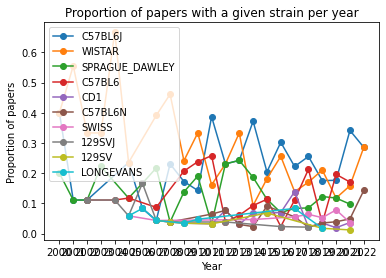

In [52]:
fig, ax = plt.subplots()

for strain in most_common_strains:
    strain_df = strain_year_count[strain_year_count["all_processed_strains"] == strain]   

    ax.plot(strain_df["publication_year"], strain_df["proportion_of_papers"], '-o', label=strain)
plt.legend()
plt.xticks(strain_year_count["publication_year"].unique())
plt.title("Proportion of papers with a given strain per year")
plt.xlabel("Year")
plt.ylabel("Proportion of papers")
plt.savefig("./proc/plots/year_vs_strain.png")

In [53]:
mice_strain_year_count

,publication_year,all_processed_strains,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",...,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",mice_used,rats_used,per_subject_processed_strains,proportion_of_papers
0,2000,C57BL6J,2,2,2,2,2,2,0,2,...,2,2,2,2,2,0,2,2,2,0.400000
1,2001,129SVEV,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,0.111111
2,2001,C57BL6J,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,0.111111
3,2001,OUTBREED_ALBINO_NMRI,1,1,1,1,1,1,0,1,...,1,1,1,1,1,0,1,1,1,0.111111
4,2002,129SVJ,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,2021,SWISS,3,3,3,3,3,3,0,3,...,3,3,3,3,3,0,3,3,3,0.036585
243,2021,WISTAR,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,0.012195
244,2022,C57BL6J,2,2,2,2,2,2,0,2,...,2,2,2,2,2,0,2,2,2,0.285714
245,2022,C57BL6N,1,1,1,1,1,1,0,1,...,1,1,1,1,1,0,1,1,1,0.142857


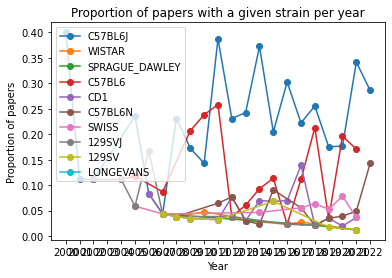

In [54]:
fig, ax = plt.subplots()
for strain in most_common_strains:
    strain_df = mice_strain_year_count[mice_strain_year_count["all_processed_strains"] == strain]   

    ax.plot(strain_df["publication_year"], strain_df["proportion_of_papers"], '-o', label=strain)
plt.legend()
plt.xticks(strain_year_count["publication_year"].unique())
plt.title("Proportion of papers with a given strain per year")
plt.xlabel("Year")
plt.ylabel("Proportion of papers")
plt.savefig("./proc/plots/year_vs_strain.png")

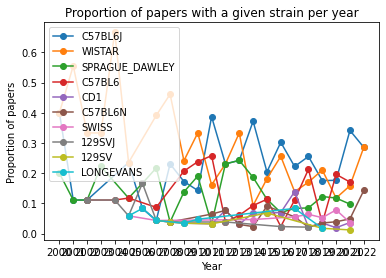

In [55]:
fig, ax = plt.subplots()

for strain in most_common_strains:
    strain_df = strain_year_count[strain_year_count["all_processed_strains"] == strain]   

    ax.plot(strain_df["publication_year"], strain_df["proportion_of_papers"], '-o', label=strain)
plt.legend()
plt.xticks(strain_year_count["publication_year"].unique())
plt.title("Proportion of papers with a given strain per year")
plt.xlabel("Year")
plt.ylabel("Proportion of papers")
plt.savefig("./proc/plots/year_vs_strain.png")

## Trends in Sex of the Subject

In [56]:
survey_df["Subject Sex"]

0                   Male
1                   Male
2                 Female
3                   Male
4                 Female
             ...        
664    Does not specifiy
665                 Male
666               Female
667               Female
668            Uses both
Name: Subject Sex, Length: 669, dtype: object

In [57]:
survey_df.head()

,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),Subject Strain (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black,...,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",publication_year,mice_used,rats_used,all_processed_strains,per_subject_processed_strains
0,4/15/2022 10:27:14,"Pervasive social deficits, but normal parturit...","Takayanagi, Yuki",2005-10,Naeliz Lopez,NaN,yes,Mice,no,129/SvJ mixed C57BL/6J,...,yes,Yes,Age,"No, I feel confident, and I double-checked all...",NaN,2005,1,0,"[129SVJ, C57BL6J]",[129SVJ MIXED C57BL6J]
1,4/1/2022 14:50:05,Impaired social behaviors and minimized oxytoc...,"Lee, Jin Hwan",2018-07,Naeliz Lopez,NaN,yes,Mice,no,129/SvJ mixed Swiss black,...,yes,Yes,"Age, Sex, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",NaN,2018,1,0,"[129SVJ, SWISS_BLACK]",[129SVJ MIXED SWISS_BLACK]
2,2/23/2022 16:29:25,"Involvement of estrogen receptor α, β and oxyt...","Choleris, Elena",2006-01,Meghan Cum,NaN,yes,Mice,no,129/SvJ mixed w/ C57BL/6J; 129/SvJ mixed w/ Sw...,...,yes,Yes,"Age, Sex",NaN,NaN,2006,1,0,"[129SVJ, W_C57BL6J, 129SVJ, W_SWISS_BLACK]","[129SVJ MIXED W_C57BL6J, 129SVJ MIXED W_SWISS_..."
3,4/22/2022 13:56:24,Targeting oxytocin receptor (Oxtr)-expressing ...,"Horiai, Machi",2020-12,Ezra Wright,NaN,yes,Mice,no,129× C57BL/6J,...,yes,Yes,Sex,"No, I feel confident, and I double-checked all...",NaN,2020,1,0,[129C57BL6J],[129C57BL6J]
4,4/28/2022 15:07:53,"Somatosensorimotor and Odor Modification, Alon...","Arakawa, Hiroyuki",2020-10,Ezra Wright,NaN,yes,Mice,no,B6,...,no,No,"Age, Sex, Housing History","No, I feel confident, and I double-checked all...",NaN,2020,1,0,[B6],[B6]


In [58]:
survey_df["subject_sex_list"] = survey_df["Subject Sex"].apply(lambda x: x.split(", "))

In [59]:
all_sexes_df = survey_df.explode("subject_sex_list").reset_index()


In [60]:
all_sexes_df["subject_sex_list"].unique()

array(['Male', 'Female', 'Uses both', 'Does not specifiy'], dtype=object)

In [61]:
sex_year_count = all_sexes_df.groupby(['publication_year','subject_sex_list'], as_index=False).size()

In [62]:
sex_year_count.head()

,publication_year,subject_sex_list,size
0,2000,Male,5
1,2001,Female,1
2,2001,Male,8
3,2002,Male,9
4,2003,Female,2


In [63]:
year_to_number_of_paper_dict

{2000: 5,
 2001: 9,
 2002: 9,
 2003: 9,
 2004: 9,
 2005: 17,
 2006: 12,
 2007: 23,
 2008: 26,
 2009: 29,
 2010: 21,
 2011: 31,
 2012: 26,
 2013: 33,
 2014: 43,
 2015: 44,
 2016: 43,
 2017: 36,
 2018: 47,
 2019: 57,
 2020: 51,
 2021: 82,
 2022: 7}

In [64]:
sex_year_count["proportion_of_papers"] = sex_year_count.apply(lambda x: x["size"] / year_to_number_of_paper_dict[x["publication_year"]], axis=1) 

In [65]:
sex_year_count

,publication_year,subject_sex_list,size,proportion_of_papers
0,2000,Male,5,1.000000
1,2001,Female,1,0.111111
2,2001,Male,8,0.888889
3,2002,Male,9,1.000000
4,2003,Female,2,0.222222
...,...,...,...,...
70,2021,Male,48,0.585366
71,2021,Uses both,28,0.341463
72,2022,Female,2,0.285714
73,2022,Male,3,0.428571


In [66]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

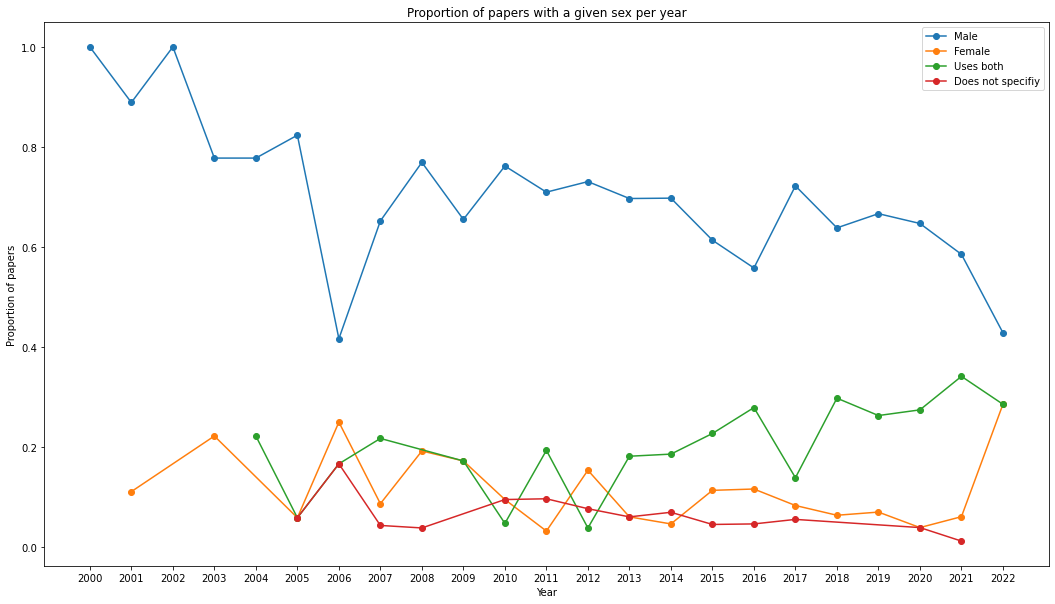

In [67]:
fig, ax = plt.subplots()

for sex in sex_year_count["subject_sex_list"].unique():
    sex_df = sex_year_count[sex_year_count["subject_sex_list"] == sex]
    ax.plot(sex_df["publication_year"], sex_df["proportion_of_papers"], '-o', label=sex)
plt.legend()
plt.xticks(strain_year_count["publication_year"].unique())
plt.title("Proportion of papers with a given sex per year")
plt.xlabel("Year")
plt.ylabel("Proportion of papers")
plt.savefig("./proc/plots/year_vs_sex.png")

## Trends in Type of the Subject

In [68]:
survey_df["Subject Type"]

0                                       both
1                                       both
2                                       both
3      transgenic (Cre or Flp line, KO line)
4                             WT (wild type)
                       ...                  
664                                     both
665                                     both
666                           WT (wild type)
667                                     both
668    transgenic (Cre or Flp line, KO line)
Name: Subject Type, Length: 669, dtype: object

In [69]:
type_year_count = per_subject_processed_strains_df.groupby(['publication_year','Subject Type'], as_index=False).size()

In [70]:
type_year_count["proportion_of_papers"] = type_year_count.apply(lambda x: x["size"] / year_to_number_of_paper_dict[x["publication_year"]], axis=1) 

In [71]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

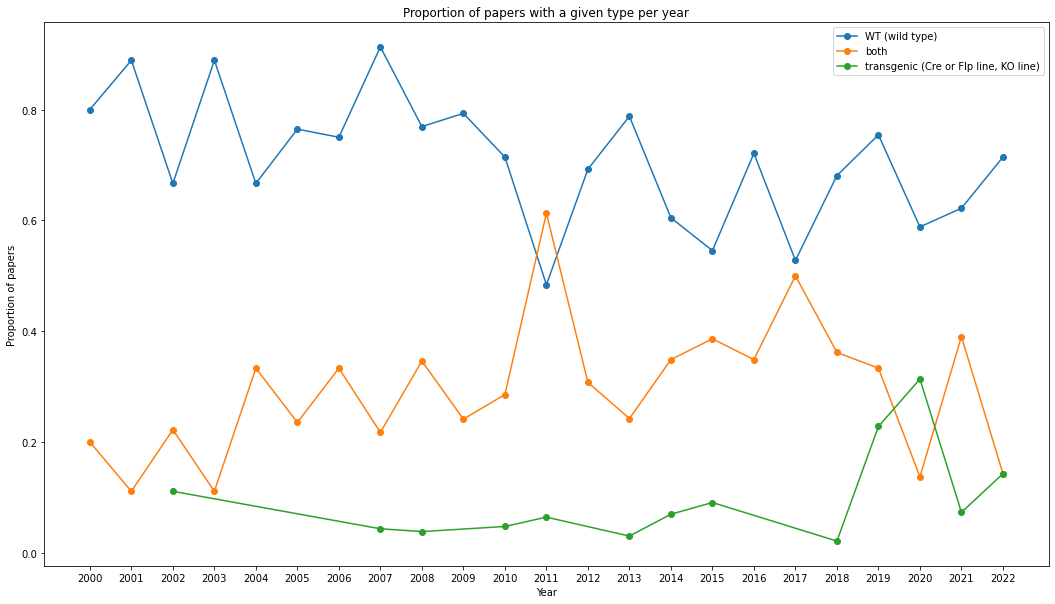

In [72]:
fig, ax = plt.subplots()

for subject_type in type_year_count["Subject Type"].unique():
    type_df = type_year_count[type_year_count["Subject Type"] == subject_type]
    ax.plot(type_df["publication_year"], type_df["proportion_of_papers"], '-o', label=subject_type)
plt.legend()
plt.xticks(strain_year_count["publication_year"].unique())
plt.title("Proportion of papers with a given type per year")
plt.xlabel("Year")
plt.ylabel("Proportion of papers")
plt.savefig("./proc/plots/year_vs_type.png")

## Trends in Age of the Subject

In [73]:
survey_df["Subject Age"]

0                                    adult (12-24 weeks)
1                                    adult (12-24 weeks)
2                                    adult (12-24 weeks)
3          young adult (8-12 weeks), adult (12-24 weeks)
4                                    adult (12-24 weeks)
                             ...                        
664                             young adult (8-12 weeks)
665        young adult (8-12 weeks), adult (12-24 weeks)
666        young adult (8-12 weeks), adult (12-24 weeks)
667        young adult (8-12 weeks), adult (12-24 weeks)
668    juvenile (3-7 weeks or week not specified), yo...
Name: Subject Age, Length: 669, dtype: object

In [74]:
column_name = "Subject Age"

In [75]:
fixed_column_name = column_name + "_fixed"

In [76]:
copy_of_survey_df = survey_df.copy()

In [77]:
copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: x.split(", "))

# ADD proportion

In [78]:
copy_of_survey_df[fixed_column_name]

0                                  [adult (12-24 weeks)]
1                                  [adult (12-24 weeks)]
2                                  [adult (12-24 weeks)]
3        [young adult (8-12 weeks), adult (12-24 weeks)]
4                                  [adult (12-24 weeks)]
                             ...                        
664                           [young adult (8-12 weeks)]
665      [young adult (8-12 weeks), adult (12-24 weeks)]
666      [young adult (8-12 weeks), adult (12-24 weeks)]
667      [young adult (8-12 weeks), adult (12-24 weeks)]
668    [juvenile (3-7 weeks or week not specified), y...
Name: Subject Age_fixed, Length: 669, dtype: object

In [79]:
exploded_column_df = copy_of_survey_df.explode(fixed_column_name).reset_index()


In [80]:
exploded_column_df[fixed_column_name]

0                             adult (12-24 weeks)
1                             adult (12-24 weeks)
2                             adult (12-24 weeks)
3                        young adult (8-12 weeks)
4                             adult (12-24 weeks)
                          ...                    
808                      young adult (8-12 weeks)
809                           adult (12-24 weeks)
810    juvenile (3-7 weeks or week not specified)
811                      young adult (8-12 weeks)
812                           adult (12-24 weeks)
Name: Subject Age_fixed, Length: 813, dtype: object

In [81]:
column_year_count = exploded_column_df.groupby(['publication_year', fixed_column_name], as_index=False).size()

In [82]:
column_year_count

,publication_year,Subject Age_fixed,size
0,2000,adult (12-24 weeks),1
1,2000,adult (24-40 weeks),1
2,2000,adult (week not specified),3
3,2001,adult (12-24 weeks),1
4,2001,adult (24-40 weeks),1
...,...,...,...
135,2021,juvenile (3-7 weeks or week not specified),20
136,2021,old (+40 weeks),4
137,2021,young adult (8-12 weeks),36
138,2022,juvenile (3-7 weeks or week not specified),2


In [83]:
column_year_count["proportion_of_papers"] = column_year_count.apply(lambda x: x["size"] / year_to_number_of_paper_dict[x["publication_year"]], axis=1) 

In [84]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

In [85]:
age_name_ordered = ['infant (0-21 days)', 'juvenile (3-7 weeks or week not specified)', 'young adult (8-12 weeks)', \
    'adult (week not specified)', 'adult (12-24 weeks)', 'adult (24-40 weeks)', 'old (+40 weeks)', 'does not specify']



       

In [86]:
exploded_column_df[fixed_column_name].unique()

array(['adult (12-24 weeks)', 'young adult (8-12 weeks)',
       'adult (24-40 weeks)', 'old (+40 weeks)', 'does not specify',
       'adult (week not specified)', 'infant (0-21 days)',
       'juvenile (3-7 weeks or week not specified)'], dtype=object)

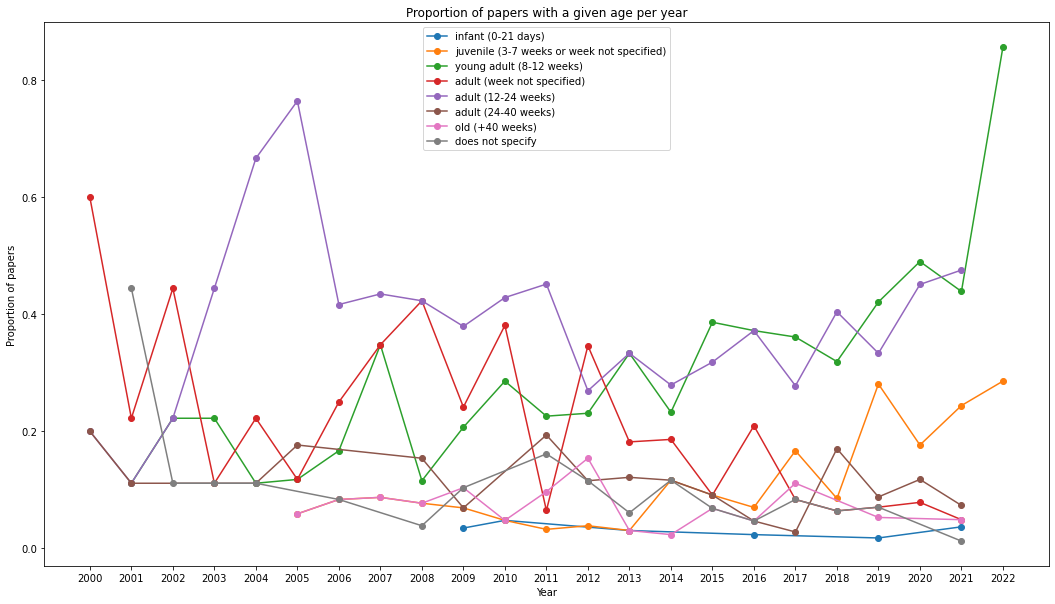

In [87]:
fig, ax = plt.subplots()

for value in age_name_ordered:
    type_df = column_year_count[column_year_count[fixed_column_name] == value]
    ax.plot(type_df["publication_year"], type_df["proportion_of_papers"], '-o', label=value)
plt.legend()
# plt.xticks(column_year_count["publication_year"].unique())
plt.title("Proportion of papers with a given age per year")
plt.xlabel("Year")
plt.ylabel("Proportion of papers")
plt.xticks(column_year_count["publication_year"].unique())
plt.savefig("./proc/plots/year_vs_age.png")

## Trends in Housing of the Subject

In [88]:
survey_df["Subject Housing"]

0                                          singly-housed
1                                           group-housed
2                                          singly-housed
3      group-housed, singly-housed for less than a we...
4                                           group-housed
                             ...                        
664    singly-housed for less than a week before expe...
665                                     does not specify
666    singly-housed for less than a week before expe...
667                                        singly-housed
668                                     does not specify
Name: Subject Housing, Length: 669, dtype: object

In [89]:
column_name = "Subject Housing"

In [90]:
fixed_column_name = column_name + "_fixed"

In [91]:
copy_of_survey_df = survey_df.copy()

In [92]:
copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: x.split(", "))

In [93]:
exploded_column_df = copy_of_survey_df.explode(fixed_column_name).reset_index()


In [94]:
column_year_count = exploded_column_df.groupby(['publication_year', fixed_column_name], as_index=False).size()

In [95]:
column_year_count["proportion_of_papers"] = column_year_count.apply(lambda x: x["size"] / year_to_number_of_paper_dict[x["publication_year"]], axis=1) 

In [96]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

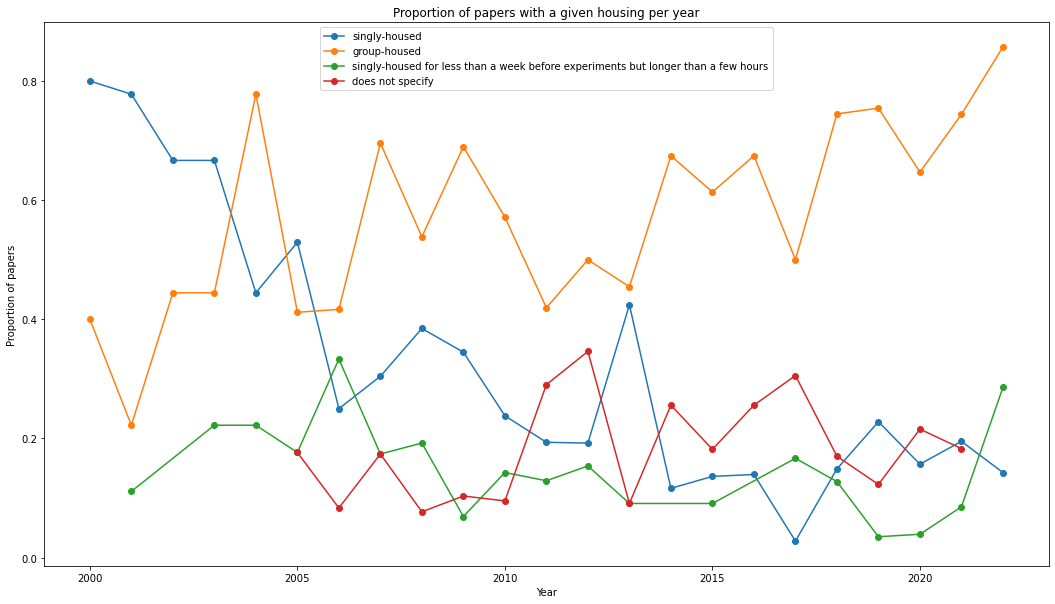

In [97]:
fig, ax = plt.subplots()

for value in exploded_column_df[fixed_column_name].unique():
    type_df = column_year_count[column_year_count[fixed_column_name] == value]
    ax.plot(type_df["publication_year"], type_df["proportion_of_papers"], '-o', label=value)
plt.legend()
# plt.xticks(column_year_count["publication_year"].unique())
plt.title("Proportion of papers with a given housing per year")
plt.xlabel("Year")
plt.ylabel("Proportion of papers")
plt.savefig("./proc/plots/year_vs_housing.png")


## Trends in Age of the Subject

In [98]:
survey_df["Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) "].unique()

array(['+5 min - hours of facetime and/or multiple exposure periods',
       'multiple exposure periods (+5 min - hours of facetime)',
       '5 min exposure or less',
       '5 min exposure or less, +5 min - hours of facetime and/or multiple exposure periods, littermate',
       '+5 min - hours of facetime and/or multiple exposure periods, littermate',
       'Does not specify',
       '5 min exposure or less, multiple exposure periods (+5 min - hours of facetime)',
       '5 min exposure or less, +5 min - hours of facetime and/or multiple exposure periods',
       '5 min exposure or less, littermate', 'not specified',
       'cage mate (i.e. caged together for weeks+ but not from the same litter)',
       'Happens over multiple days but time each day unspecified',
       'offspring ', 'littermate',
       '+5 min - hours of facetime and/or multiple exposure periods, cage mate of less than a week',
       'Unspecified'], dtype=object)

In [99]:
survey_df["Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) "].unique()

array(['+5 min - hours of facetime and/or multiple exposure periods',
       'multiple exposure periods (+5 min - hours of facetime)',
       '5 min exposure or less',
       '5 min exposure or less, +5 min - hours of facetime and/or multiple exposure periods, littermate',
       '+5 min - hours of facetime and/or multiple exposure periods, littermate',
       'Does not specify',
       '5 min exposure or less, multiple exposure periods (+5 min - hours of facetime)',
       '5 min exposure or less, +5 min - hours of facetime and/or multiple exposure periods',
       '5 min exposure or less, littermate', 'not specified',
       'cage mate (i.e. caged together for weeks+ but not from the same litter)',
       'Happens over multiple days but time each day unspecified',
       'offspring ', 'littermate',
       '+5 min - hours of facetime and/or multiple exposure periods, cage mate of less than a week',
       'Unspecified'], dtype=object)

In [100]:
column_name = "Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) "

In [101]:
fixed_column_name = column_name + "_fixed"

In [102]:
copy_of_survey_df = survey_df.copy()

In [103]:
copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: x.split(", "))

In [104]:
exploded_column_df = copy_of_survey_df.explode(fixed_column_name).reset_index()


In [105]:
exploded_column_df[fixed_column_name] = exploded_column_df[fixed_column_name].apply(lambda x: "Not Specified" if "pec" in x else x)
exploded_column_df[fixed_column_name] = exploded_column_df[fixed_column_name].apply(lambda x: "+5 min - hours of facetime and/or multiple exposure periods" if "+5 min" in x else x)

In [106]:
exploded_column_df[fixed_column_name].unique()

array(['+5 min - hours of facetime and/or multiple exposure periods',
       '5 min exposure or less', 'littermate', 'Not Specified',
       'cage mate (i.e. caged together for weeks+ but not from the same litter)',
       'offspring ', 'cage mate of less than a week'], dtype=object)

In [107]:
column_year_count = exploded_column_df.groupby(['publication_year', fixed_column_name], as_index=False).count()

In [108]:
familiarity_list = column_year_count[fixed_column_name].unique()

In [109]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

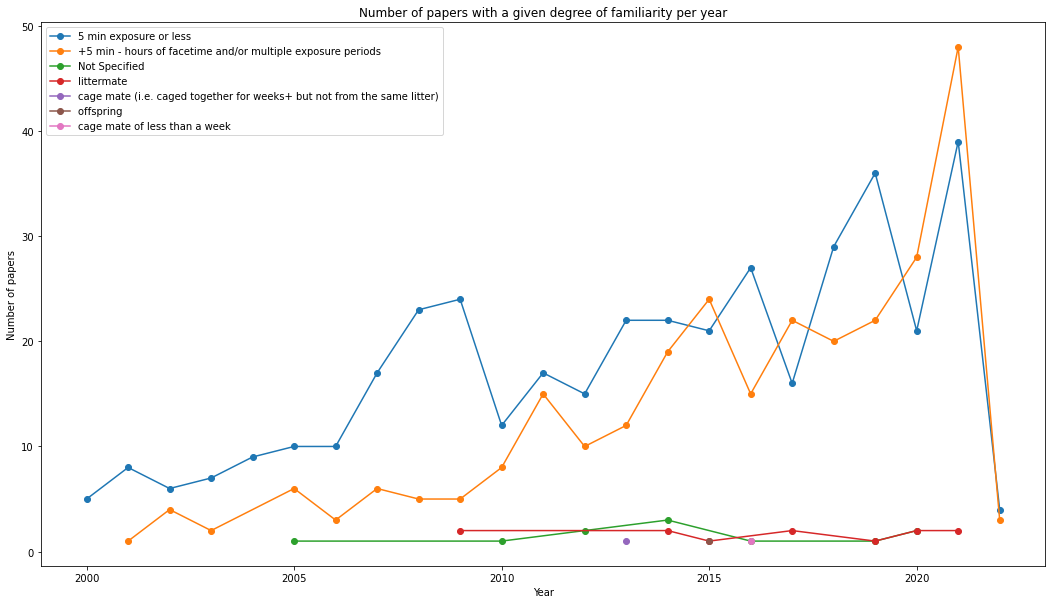

In [110]:
fig, ax = plt.subplots()

for value in familiarity_list:
    type_df = column_year_count[column_year_count[fixed_column_name] == value]
    ax.plot(type_df["publication_year"], type_df["index"], '-o', label=value)
plt.legend()
# plt.xticks(column_year_count["publication_year"].unique())
plt.title("Number of papers with a given degree of familiarity per year")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.savefig("./proc/plots/year_vs_familiarity.png")

## Trends in Type of the Subject

In [111]:
survey_df["Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject"]

0      yes
1      yes
2      yes
3      yes
4       no
      ... 
664     no
665    yes
666     no
667     no
668    yes
Name: Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject, Length: 669, dtype: object

In [112]:
column_name = "Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject"

In [113]:
type_year_count = survey_df.groupby(['publication_year', column_name], as_index=False).size()

In [114]:
type_year_count["proportion_of_papers"] = type_year_count.apply(lambda x: x["size"] / year_to_number_of_paper_dict[x["publication_year"]], axis=1) 

In [115]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

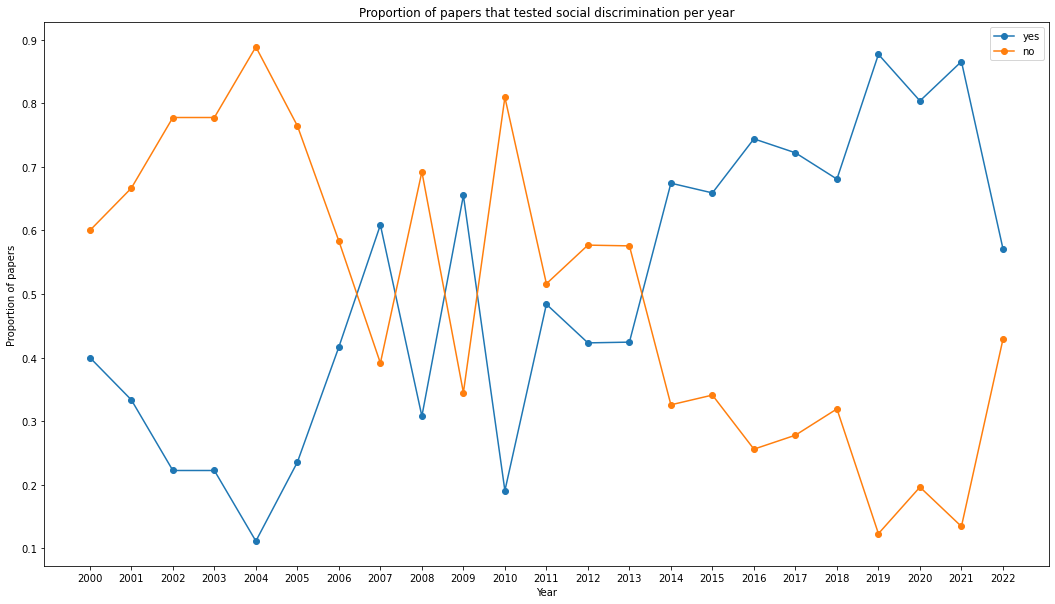

In [116]:
fig, ax = plt.subplots()

for value in survey_df[column_name].unique():
    type_df = type_year_count[type_year_count[column_name] == value]
    ax.plot(type_df["publication_year"], type_df["proportion_of_papers"], '-o', label=value)
plt.legend()
plt.xticks(strain_year_count["publication_year"].unique())
plt.title("Proportion of papers that tested social discrimination per year")
plt.xlabel("Year")
plt.ylabel("Proportion of papers")
plt.savefig("./proc/plots/year_vs_discrimination.png")

## Trends in Type of the Subject

In [117]:
survey_df["Subject Social Rank"]

0      Does not specify
1      Does not specify
2      Does not specify
3      Does not specify
4      Does not specify
             ...       
664    Does not specify
665    Does not specify
666    Does not specify
667    Does not specify
668    Does not specify
Name: Subject Social Rank, Length: 669, dtype: object

In [118]:
column_name = "Subject Social Rank"

In [119]:
fixed_column_name = column_name + "_fixed"

In [120]:
survey_df[fixed_column_name] = survey_df[column_name].apply(lambda x: x.split(", "))

In [121]:
all_ranking_df = survey_df.explode(fixed_column_name).reset_index()


In [122]:
all_ranking_df[fixed_column_name].unique()

array(['Does not specify', 'Dominant', 'Subordinate', 'Defeated'],
      dtype=object)

In [123]:
type_year_count = all_ranking_df.groupby(['publication_year',fixed_column_name], as_index=False).size()

In [124]:
type_year_count

,publication_year,Subject Social Rank_fixed,size
0,2000,Defeated,1
1,2000,Does not specify,5
2,2001,Defeated,1
3,2001,Does not specify,8
4,2002,Does not specify,9
5,2003,Does not specify,9
6,2004,Does not specify,9
7,2005,Does not specify,17
8,2006,Does not specify,12
9,2007,Does not specify,22


In [125]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

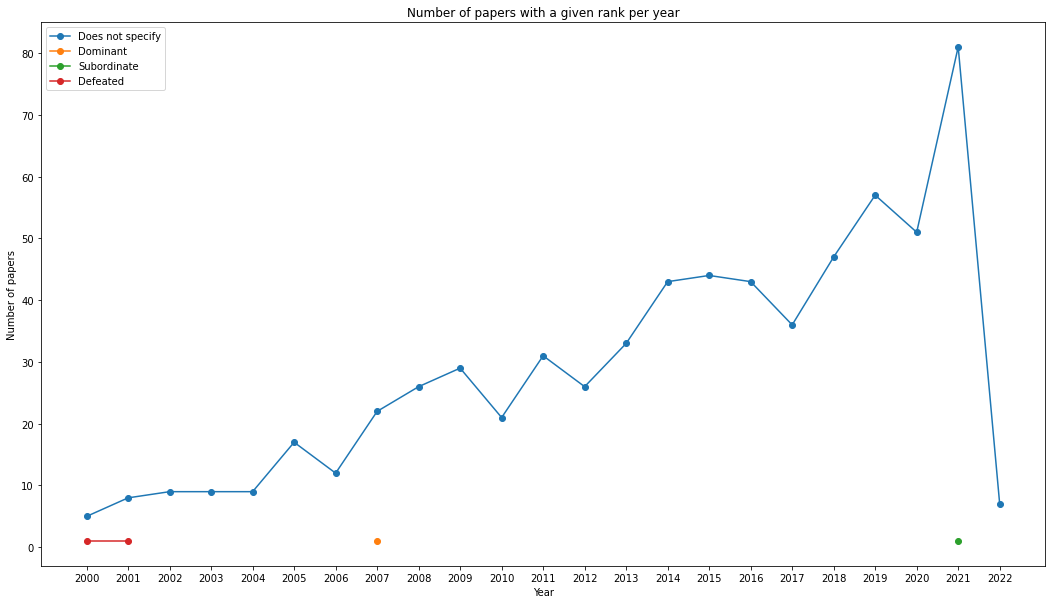

In [126]:
fig, ax = plt.subplots()

for value in all_ranking_df[fixed_column_name].unique():
    type_df = type_year_count[type_year_count[fixed_column_name] == value]
    ax.plot(type_df["publication_year"], type_df["size"], '-o', label=value)
plt.legend()
plt.xticks(strain_year_count["publication_year"].unique())
plt.title("Number of papers with a given rank per year")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.savefig("./proc/plots/year_vs_rank.png")